#***Enlace para edición del Notebook en linea***

Enlace para edición del Notebook en linea: [Click aqui para acceder al notebook online con permisos de edición](https://colab.research.google.com/drive/1R2a3fdpNCOgTHYy7ky56hQQOA_cnogVk?usp=sharing)

#***Indice***

1. ***Incialización de datos y entorno***

   ***A. Lectura de datos***
   
   ***B. Importación de Librerias a utilizar***
   
   ***C. Definición de caracteristicas y atributo clase***
   
   ***D. Definición de funciónes para probar los datos con modelos de aprendizaje***

2. ***Limpieza y tratamiento de datos***

     ***A. Eliminar registros duplicados en los datos***
    
     ***B. Tratamiento de valores faltantes***
    
     ***C. Tratamiento de outliers***
    
     ***D. Identificar ruido y valores inconsistentes***
    
     ***E. Manejo de datos no numericos***

      * ***Tratamiento de fechas***

      * ***Tratamiento de datos categoricos***
     
  ***F. Discretizar atributo clase o objetivo***
   
      * ***Discretizar en 2 intervalos***

      * ***Discretizar en 3 intervalos***

      * ***Comparación y conclusión sobre la mejor opción***

3. ***Evaluación para normalización o estandarización de datos***

   ***A. Aplicación de normalización***

   ***B. Aplicación de estandarización***

   ***C. Comparación y conclusión sobre la mejor técnica***

4. ***Análisis de correlación de características y selección de características***

   ***A. Aplicación de Análisis de componentes principales (PCA)***

   ***B. Aplicación de Método de filtrado con correlación de Pearson***

   ***C. Aplicación de Método Wrapper: Eliminación hacia atras***

   ***D. Aplicación de Metodo Wrapper: Eliminación de características recursiva***
  
   ***E. Aplicación de Método embebido***

   ***F. Aplicación de Árboles extremadamente aleatorizados (Extra Tree Classifier) para selección de caracteristicas***

   ***G. Comparación y conclusión sobre la mejor tecnica***

5. ***Visualización de datos preprocesados***

   ***A. Histogramas***
   
   ***B. Graficos de dispersión***
   
   ***C. Proyección lineal***
   
   ***D. Visualización radial***

   ***E. Pairplot de los datos***

   ***F. Mapa de calor de correlación***

6. ***Muestreo y Testeo con clasificadores***

   ***A. K vecinos más cercanos (KNN)***
   
     * ***Split simple***

     * ***Cross-validation***

     * ***Cross-validation estratificado***

   ***B. Arbol de Decisión***

     * ***Split simple***

     * ***Cross-validation***

     * ***Cross-validation estratificado***

   ***C. Máquinas de vectores de soporte (SVM)***

     * ***Split simple***

     * ***Cross-validation***

     * ***Cross-validation estratificado***

   ***D. Perceptron Multicapa***
   
     * ***Split simple***

     * ***Cross-validation***

     * ***Cross-validation estratificado***

   ***E. Comparación y conclusión sobre el mejor resultado***


#***1. Inicialización de datos y entorno***

##***A. Lectura de datos***

En el siguiente apartado, se lee el conjunto de datos respectivo desde google drive. 

In [0]:
#Leer un CSV 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
from google.colab import data_table

link_google_drive = 'https://drive.google.com/open?id=1pqUUWfYlLrqUmZzh63vQdxqJlN9y7BgT'
flu, id = link_google_drive.split('=')
dataset = drive.CreateFile({'id':id})
dataset.GetContentFile('covid_de.csv')
df = pd.read_csv('covid_de.csv')
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-17,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,2020-03-25,1,0,1


##***B. Importación de Librerias a utilizar***

In [0]:
#Librerias
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

##***C. Definición de caracteristicas y atributo clase***

Ahora bien, se procedera a definir cada atributo del conjunto de datos obtenido y a identificar el atributo clase o objetivo:

***Caracteristicas***

* **Estado (state):** indica el estado de Alemania respectivo en el que se reportaron los casos, recuperados y muertos por coronavirus. Esto es así, ya que los datos son de Alemania.

* **Condado (county):** indica el condado respectivo en el que se reportaron los casos, recuperados y muertos por coronavirus.

* **Grupo de edad (age group):** indica el grupo de edad al que pertenecen los casos, recuperados y muertos por coronavirus reportados. 

* **Genero (gender):** indica el genero al que pertenecen los casos, recuperados y muertos por coronavirus reportados. 

* **Fecha (date):** indica la fecha en la que se reportaron los casos, recuperados y muertos por coronavirus.

* **Muertos (deaths):** indica la cantidad de muertos de coronavirus respectiva.

* **Recuperados (recoverd):** indica la cantidad de recuperados de coronavirus respectiva.

***Atributo clase o objetivo***

* ***Casos (cases):*** indica la cantidad de casos de coronavirus respectiva. Se eligio este atributo como columna clase, ya que con respecto a los otros datos tu lo puedes saber o determinar con facilidad. Si alguien esta muerto, es facil de identificar. Si alguien estuvo en el hospital por coronavirus y se recupero, tambien es facil de identificar. No obstante, con respecto a **Casos (cases)**, es necesario realizar pruebas de descarte para identificar los casos de coronavirus respectivo. Los modelos que se presentaran a continuación, permitiran predecir la cantidad de casos de coronavirus sin necesidad de pruebas medicas. En ese sentido, representa una ventaja, ya que dichas pruebas son de dificil acceso para ciertas regiones. 

En el siguiente codigo, se guardan los nombre de las columnas de el conjunto de datos en un arreglo llamado ***names***. 

In [0]:
#Guardando el nombre de las columnas del dataset en un arreglo
names = df.columns.values

**Esta parte no es del todo generica**, ya que es importante identificar la columna clase o objetivo en las distintas pruebas a realizar. La columna clase o objetivo no necesariamente va a tener el mismo indice o nombre en todos los conjutos de datos. En ese sentido, en el codigo de abajo, se identifica el **indice de la columna clase** y los nombres de las caracteristicas se incluyen en un arreglo excluyendo la columa objetivo. 

In [0]:
#Se debe indicar el indice de la columna que corresponde a la columna clase o objetivo:
ind_clase = 5
#Se debe determinar y guardar las caracteristcas del dataset excluyendo la columna o clase objetivo:
caracteristicas = []
for i in range(len(names)):
  if i != ind_clase:
    caracteristicas += [names[i]]

##***D. Definición de funciones para probar los datos con modelos de aprendizaje***

A continuación, se definen funciónes que se utilizaran luego en el trabajo. La función ***determinar_mejor_k*** sirve para determinar el valor de k optimo dado un modelo de ***knn***. La función ***testdata_score*** sirve para probar un conjunto de datos obteniendose un promedio de la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos dados. 

In [0]:
#definiendo optimizador de k
def determinar_mejor_k(X, Y, ki, kf):
  maxk = 0
  maxpre = 0
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
  for k in range(ki, kf):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predicciones = knn.predict(X_test)
    if (maxpre < accuracy_score(Y_test, predicciones)):
      maxk = k
      maxpre = accuracy_score(Y_test, predicciones)
  return maxk

#probador de datos con modelos
def testdata_score(X, Y):
  score = 0
  knn = KNN(n_neighbors=determinar_mejor_k(X, Y, 1, 6))
  score += cross_val_score(knn, X, Y, cv=5).mean()
  dtree = DecisionTreeClassifier()
  score += cross_val_score(dtree, X, Y, cv=15).mean()
  return score/2

#***2. Limpieza y tratamiento de datos*** 

##***A. Eliminar registros duplicados en la data***

Se deben eliminar los datos redundantes que se puedan encontrar en la data, ya que tener datos duplicados no representa ninguna ganacia de información. El siguiente codigo sirve para eliminar los datos duplicados.

In [0]:
#Eliminar registros duplicados en la data
df = df.drop_duplicates()

##***B. Tratamiento de valores faltantes***

Ahora bien, se deben eliminar los datos faltantes que se puedan encontrar en la data. En este caso, para identificarlos, se hizo uso de la herramienta **Orange**. En la siguiente tabla, en la columna **Missing**, se indican los datos faltantes. En este caso, solo hay 382 datos faltantes en la columna ***genero (gender)*** y 167 en la columna ***grupo de edad (age group)***.

![alt text](https://i.ibb.co/84GCT5K/stadi.png)

Cabe mencionar que hay 67017 instancias en el conjunto de datos. 382 datos faltantes solo representa un ***0.57%*** de data. Asimismo, 167 datos faltantes solo representa un ***0.25%*** de data. Se considera que no es un porcentaje muy representativo o significativo. Por ello, en el caso de los valores faltantes en columnas categoricas, estos **seran remplazados por la categoria más frecuente**. No se evaluaran otras tecnicas, ya que no se considera que ello tenga mucho impacto en el desempeño de los modelos de aprendizaje con esta data. Ello se considera así, por que el porcentaje de valores faltantes es muy pequeño. La tabla de descripción de caracteristicas se muestra a continuación. Esta tabla sera utilizada en el proceso de eliminación de valores faltantes. 

In [0]:
df.describe(include="all")

,state,county,age_group,gender,date,cases,deaths,recovered
count,67017,67017,66850,66635,67017,67017.000000,67017.000000,67017.000000
unique,16,412,6,2,80,NaN,NaN,NaN
top,Bayern,SK Muenchen,35-59,F,2020-04-03,NaN,NaN,NaN
freq,17126,537,22374,33639,2116,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.406494,0.098095,1.923736
std,NaN,NaN,NaN,NaN,NaN,2.881913,0.393087,2.763475
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-2.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,2.000000


El siguiente codigo sirve para remplazar los valores faltantes por la categoria más frecuente en atributos categoricos. En el caso de atributos numericos, se remplaza por la media. Para ello, se utiliza la tabla ***describe*** mostrada anteriormente. Asimismo, se imprime la cantidad de valores faltantes por cada columna, resultando ***0*** para todos los casos

In [0]:
#Tratamiento de valores faltantes
names = df.columns.values
for i in range(len(names)): 
  if df.dtypes[i] == 'object':
    df = df.fillna({names[i]: df.describe(include = 'all').iloc[2][i]})
  elif df.dtypes[i] == 'int64':
    df = df.fillna({names[i]: df.describe(include = 'all').iloc[8][i]})
for i in range(len(names)):
  print(len(df) - df[names[0]].count())

0
0
0
0
0
0
0
0


##***C. Tratamiento de outliers***

Ahora bien, se procedera a identificar la posible precencia de outliers en cada atributo numerico del conjunto de datos:

* Casos (cases) 

![Box Plot de Casos](https://i.ibb.co/bNZM11B/boxplot-cases.png)

Como se puede apreciar en el diagrama de caja dado anteriormente, no existen valores que superen los extremos superiores e inferiores. Por lo tanto, se concluye que no existen outliers o valores atipicos para este caso. Se debe considerar el  Rango: [0; 69]

* Muertes (deaths)

![Box Plot de muertes](https://i.ibb.co/7pYGKCN/boxplot-deaths.png)

Dado el diagrama de caja, se argumenta que no existe ningun valor atipico o outlier, ya que no existen valores que superen los extremos superiores e inferiores. Se debe considerar el  Rango: [0; 10]

* Recuperados (recovered)

![Box Plot de recuperados](https://i.ibb.co/tb8B5F0/boxplot-recovered.png)

De acuerdo al diagrama de caja, se argumenta la inexistencia de valores atipicos o outliers, ya que no existen valores que superen los extremos superiores e inferiores. Se debe considerar el  Rango: [-2; 68]

#####**Coclusión: No existen outliers con respecto a atributos numericos en el conjunto de datos analizado.**





##***D. Identificar ruido y valores inconsistentes***

Analizando los datos con la herramienta Orange, se logro determinar la existencia de valores inconsistentes en el atributo **Recuperados (recovered)**. A continuación, la distribución de dicho atributo:

![Distribución de recuperados](https://i.ibb.co/zhfX2rZ/distri-recovered-inconsistvalue.png)

Como se puede ver en la distribución anterior, se estan tomando valores menores a cero. Esto es incorrecto, ya que el atributo indica la cantidad de personas recuperadas. No es posible el registro de -2 o -1 personas recuperadas. 

**Conclusión: Se debe eliminar los valores inconsistentes en el atributo Recuperados (recovered)**

**Solución: Los valores inconsistentes en el atributo Recuperados (recovered) seran remplazados por el valor de 0.** Esta solución es razonable con respecto al contexto, ya que se indicaria que se han recuperado 0 personas y no -2 o -1 personas. Otra alternativa consiste en eliminar los datos que presenten esta inconsistencia, pero eso implicaria perdida de información. No se comparara cada alternativa con relación a resultados, ya que solo un ***0.05%*** de los datos son inconsistentes. Por lo tanto, no se considera que esta modificación afecte en la precisión de los clasificadores. 





A continuación, se remplazan los valores inconsistentes en el atributo **Recuperados (recovered)** por el valor de ***0***. **En este caso, no es posible que el codigo sea del todo generico**, puesto que se debe indicar sobre que columna aplicar el tratamiento. Este tratamiento no podria ser valido para cualquier columna de otro conjunto de datos, ya que no cualquier atributo presenta este tipo de inconsistencia. Se imprimen datos de la columna **Recuperados (recovered)**, mostrando que el minimo valor en dicho atributo ahora es 0, comprobandose la eliminación de la inconsistencia. 

In [0]:
#Remplazar los valores inconsistentes en el atributo Recuperados (recovered) por el valor de 0
ind = 7 #Se debe indicar el indice de la columna a tratar
df[names[ind]] = df[names[ind]].replace([-2, -1], 0)
df.describe()[names[ind]]

count    67017.000000
mean         1.924243
std          2.763019
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         68.000000
Name: recovered, dtype: float64

##***E. Manejo de datos no numericos***

###***Tratamiento de fechas***

Es importante transformar los datos que indican fechas en un formato que sea conveniente para el problema. En este caso, la columna **Fecha (date)** es de tipo ***object***. Se desea que esta sea de tipo **int**. En ese sentido, las fechas seran transformadas a numeros, donde el numero indicara la cantidad de dias que pasaron desde el nacimiento de Jesus. Esta transformación se realiza así, ya que se desea predecir el numero de casos de coronavirus reportados en determinado dia. Dicho numero de casos no depende de el dia de la semana o el dia del més, sino depende de la cantidad de días que han pasado desde que empezo el brote. Dado este razonamiento, tiene sentido el tratamiento que se muestra a continuación. **Cabe resaltar que este tratamiento no es del todo generico**, puesto que solo es aplicable a un tipo de atributo fecha o ***date***. No todos los conjuntos de datos presentan este tipo de atributos. Se imprimen las primeras 5 instancias del conjunto de datos con el atributo **Fecha (date)** correctamente transformado. 

In [0]:
#Tratamiento de fechas
ind = 4 #Se debe indicar el indice de la columna a tratar
df[names[ind]] = pd.to_datetime(df[names[ind]])
df[names[ind]] = df[names[ind]].apply(lambda x:x.toordinal())
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,737511,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,737512,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,737518,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,737501,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,05-14,F,737509,1,0,1


###***Tratamiento de datos categoricos***

La mayoria de modelo de aprendizaje solo entienden de datos numericos. En ese sentido, es apropiado codificar las variables categoricas del conjunto de datos. A continuación, se realiza lo especificado. Se imprimen las primeras 5 instancias del conjunto de datos con las variables categoricas codificadas a numeros. 

In [0]:
from sklearn.preprocessing import LabelEncoder
#Codificando todas las variables categoricas, ya que los clasificadores solo entienden datos numericos
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,0,2,0,0,737511,1,0,1
1,0,2,0,0,737512,1,0,1
2,0,2,0,0,737518,1,0,1
3,0,2,1,0,737501,1,0,1
4,0,2,1,0,737509,1,0,1


##***F. Discretizar atributo clase o objetivo***

La variable **Casos (cases)**  es de tipo numerica. Asimismo esta variable representa datos que van desde el ***0*** hasta el ***69***. Se plantea discretizar esta variable, de tal manera que este compuesta por intervalos. Estos intervalos deben procurar contender la cantidad de datos más parecida posible entre ellos. A continuación, se muestra una función que sirve para discretizar variables numericas dado una cantidad de intervalos. **Casos (cases)** corresponde a la variable clase o objetivo. Su discretización tiene un efecto positivo en la clasificación y aprendizaje de los modelos. 

In [0]:
#función que sirve para discretizar variables numericas dado una cantidad de intervalos
def discretize(dframe, ind_col, n_intervals):
  colnames = dframe.columns.values
  dframe[colnames[ind_col]] = pd.qcut(dframe[colnames[ind_col]], n_intervals)
  for i in range(len(dframe[colnames[ind_col]].unique())): 
    dframe[colnames[ind_col]] = dframe[colnames[ind_col]].replace([dframe[colnames[ind_col]].unique()[i]], i)
  dframe[colnames[ind_col]] = dframe[colnames[ind_col]].astype(int)
  return dframe

###***Discretizar en 2 intervalos***

Ahora bien, se discretizara el atributo clase o objetivo **Casos (cases)** en 2 intervalos. Para este caso, ambos intervalos presentan casi la misma cantidad de datos. Se promediara la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos despues de aplicada la discretización. La precisión promedio se imprime correspondientemente. 

In [0]:
#Discretizar atributo Casos (cases) en 2 intervalos 
df2 = df.copy()
df2 = discretize(df2, ind_clase, 2)

In [0]:
X = df2.loc[:, caracteristicas].values
Y = df2.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.6543207910299289


###***Discretizar en 3 intervalos***

Ahora bien, se discretizara el atributo clase o objetivo **Casos (cases)** en 3 intervalos. Para este caso, los 3 intervalos presentan una cantidad de datos muy diferenciada. Se promediara la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos despues de aplicada la discretización. La precisión promedio se imprime correspondientemente. 

In [0]:
#Discretizar atributo Casos (cases) en 3 intervalos 
df3 = df.copy()
df3 = discretize(df3, ind_clase, 3)

In [0]:
X = df3.loc[:, caracteristicas].values
Y = df3.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.6019464339228948


###***Comparación y conclusión sobre la mejor opción***

Con 2 intervalos, se obtuvo un ***65%*** de precisión. Con 3 intervalos, se obtuvo un ***60%*** de precisión. En ese sentido, es más conveniente trabajar con 2 intervalos. A continuación, se asigna que el conjunto de datos a usar tendra una discretización de 2 intervalos para el atributo clase o objetivo, el cual es **Casos (cases)**. **Los 2 intervalos finales obtenidos son así:** 

* ***El primer intervalo [0, 1] codificado con el numero 0.***
* ***El segundo intervalo [2,69] codificado con el numero 1.***

En ese sentido, a **categoria 0** implica que hay ***1 o 0*** casos de coronavirus. Asimismo la **categoria 1** implica que se registran más de ***1*** caso de coronavirus. 


In [0]:
df = df2

#***3. Evaluación para normalización o estandarización de datos***


##***A. Aplicación de normalización***

En el siguiente codigo, se aplica **normalización** sobre todos los datos del conjunto, excepto aquellos que correspondan a la columna clase o objetivo **Casos (cases)**. Se promediara la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos despues de aplicada la **normalización**. La precisión promedio se imprime correspondientemente. 

In [0]:
#Normalización de datos del dataset
dfn = df.copy()
for i in range(len(names)):
  if i != ind_clase:
    dfn[names[i]] = (df[names[i]] - df[names[i]].min())/ (df[names[i]].max()-df[names[i]].min())
dfn.describe()

,state,county,age_group,gender,date,cases,deaths,recovered
count,67017.000000,67017.000000,67017.000000,67017.000000,67017.000000,67017.000000,67017.000000,67017.000000
mean,0.347918,0.494767,0.620350,0.492353,0.717856,0.479833,0.009809,0.028298
std,0.308869,0.286281,0.229278,0.499945,0.141506,0.499597,0.039309,0.040633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.240876,0.400000,0.000000,0.612903,0.000000,0.000000,0.014706
50%,0.400000,0.491484,0.600000,0.000000,0.709677,0.000000,0.000000,0.014706
75%,0.600000,0.742092,0.800000,1.000000,0.827957,1.000000,0.000000,0.029412
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Normalización
X = dfn.loc[:, caracteristicas].values
Y = dfn.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.6365786019642125


##***B. Aplicación de estandarización***

En el siguiente codigo, se aplica **estandarización** sobre todos los datos del conjunto, excepto aquellos que correspondan a la columna clase o objetivo **Casos (cases)**. Se promediara la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos despues de aplicada la **estandarización**. La precisión promedio se imprime correspondientemente. 

In [0]:
#Estandarización de datos
dfe = df.copy()
for i in range(len(names)):
  if i != ind_clase:
    dfe[names[i]] = (df[names[i]] - df[names[i]].mean())/ df[names[i]].std()
dfe.describe()

,state,county,age_group,gender,date,cases,deaths,recovered
count,6.701700e+04,6.701700e+04,6.701700e+04,6.701700e+04,6.701700e+04,67017.000000,6.701700e+04,6.701700e+04
mean,3.830698e-13,-2.926840e-14,2.534874e-15,1.270449e-15,-2.000675e-12,0.479833,-3.888768e-14,1.422770e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499597,1.000000e+00,1.000000e+00
min,-1.126425e+00,-1.728257e+00,-2.705667e+00,-9.848132e-01,-5.072988e+00,0.000000,-2.495492e-01,-6.964278e-01
25%,-9.105834e-01,-8.868603e-01,-9.610603e-01,-9.848132e-01,-7.416850e-01,0.000000,-2.495492e-01,-3.345048e-01
50%,1.686226e-01,-1.146789e-02,-8.875711e-02,-9.848132e-01,-5.779502e-02,0.000000,-2.495492e-01,-3.345048e-01
75%,8.161463e-01,8.639245e-01,7.835461e-01,1.015406e+00,7.780705e-01,1.000000,-2.495492e-01,2.741816e-02
max,2.111194e+00,1.764814e+00,1.655849e+00,1.015406e+00,1.993875e+00,1.000000,2.519012e+01,2.391434e+01


In [0]:
#Estandarización
X = dfe.loc[:, caracteristicas].values
Y = dfe.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.7695302295036257


##***C. Comparación y conclusión sobre la mejor técnica***

Con **normalización**, se obtuvo un ***64%*** de precisión. Con **estandarización**, se obtuvo un ***77%*** de precisión. En ese sentido, es más conveniente trabajar con los datos **estandarizados**. A continuación, se asigna que el conjunto de datos a usar tendra los datos **estandarizados**.

In [0]:
df = dfe

#***4. Análisis de correlación de características y selección de características***

A continuación, se aplicara una serie de tecnicas de selección de caracteristicas y/o reducción de dimensionalidad sobre el conjunto de datos. Se evaluara que tecnica tiene mejor efecto en la precisión de los clasificadores. Para dicha evaluación, se utilizara una función llamada ***testdata_score(X, Y)***, donde ***X*** son las caracteristicas y ***Y*** es el atributo clase o objetivo. Esta función promedia la precisión de 2 clasificadores (KNN y Arbol de decisión), realizando un muestreo de **cross-validation** sobre los datos dados. Para cada tecnica aplicada, se imprimen las caracteriticas seleccionadas y luego la precisión obtenida usando dichas caracteristicas. 

##***A. Aplicación de Análisis de componentes principales (PCA)***

In [0]:
#Análisis de correlación de características y selección de características (reducción de dimensionalidad)
#Aplicando PCA al dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df.loc[:, caracteristicas].values
y = df.iloc[:,ind_clase].values
x = StandardScaler().fit_transform(x)
def pca(variance):
  pca = PCA(variance)
  pcoms = pca.fit_transform(x)
  print("con numero de columnas: ", len(pcoms[0]), end=" ")
  X = pcoms
  Y = df.iloc[:,ind_clase].values
  print("obtengo precisión: ", testdata_score(X, Y))

A continuación, se aplicara ***pca*** sobre el conjutno de datos utilizando distintos valores de **varianza retenida**. Para cada valor, se imprime la precisión respectiva para posterior comparación y evaluación. 

In [0]:
pca(.95)
pca(.9)
pca(.85)
pca(.8)

con numero de columnas:  7 obtengo precisión:  0.8061619566571907
con numero de columnas:  6 obtengo precisión:  0.80722886862685
con numero de columnas:  6 obtengo precisión:  0.8062961959425134
con numero de columnas:  5 obtengo precisión:  0.63744249039966


##***B. Aplicación de Método de filtrado con correlación de Pearson***

Se imprime el nombre de las columnas seleccionadas aplicando esta tecnica y posteriormente el resultado promedio de la evaluación con los clasificadores. Cabe mencionar que dicha evaluación es a partir de distintas muestras obtenidas con ***cross-validation***. 

In [0]:
cor = df.corr()
cor_target = abs(cor[names[ind_clase]])
peacols = []
for i in range(len(names)):
  if (i != ind_clase and cor_target[i] > 0.1):
    peacols += [names[i]]
print(peacols)

['deaths', 'recovered']


In [0]:
X = df.loc[:,peacols].values
Y = df.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.9099784966085203


##***C. Aplicación de Método Wrapper: Eliminación hacia atrás***

Se imprime el nombre de las columnas seleccionadas aplicando esta tecnica y posteriormente el resultado promedio de la evaluación con los clasificadores. Cabe mencionar que dicha evaluación es a partir de distintas muestras obtenidas con ***cross-validation***. 

In [0]:
#Eliminación hacia atras
X = df.drop(names[ind_clase], 1) 
Y = df[names[ind_clase]]
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
becols = cols
print(becols)

['state', 'gender', 'date', 'deaths', 'recovered']


In [0]:
print(testdata_score(X, Y))

0.7689557858080666


##***D. Aplicación de Método Wrapper: Eliminación de Característica Recursiva***

Se imprime el nombre de las columnas seleccionadas aplicando esta tecnica y posteriormente el resultado promedio de la evaluación con los clasificadores. Cabe mencionar que dicha evaluación es a partir de distintas muestras obtenidas con ***cross-validation***. 

In [0]:
X = df.drop(names[ind_clase], 1) 
Y = df[names[ind_clase]]
high_score=0
nof=0           
for i in range(len(X.columns)):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,i+1)
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    if(score>high_score):
        high_score = score
        nof = i+1
model = LinearRegression()
rfe = RFE(model, nof)             
X_rfe = rfe.fit_transform(X,Y)  
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = X.columns)
rfecols = temp[temp==True].index
print(rfecols)

Index(['state', 'gender', 'date', 'deaths', 'recovered'], dtype='object')


In [0]:
X = df.loc[:,rfecols].values
Y = df.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.8566992260669679


##***E. Aplicación de Método embebido***

Se imprime el nombre de las columnas seleccionadas aplicando esta tecnica y posteriormente el resultado promedio de la evaluación con los clasificadores. Cabe mencionar que dicha evaluación es a partir de distintas muestras obtenidas con ***cross-validation***. 

In [0]:
X = df.drop(names[ind_clase], 1) 
Y = df[names[ind_clase]]
reg = LassoCV()
reg.fit(X, Y)
coef = pd.Series(reg.coef_, index = X.columns)
embbcols = coef[abs(coef) > 0.01].index
print(embbcols)

Index(['state', 'date', 'deaths', 'recovered'], dtype='object')


In [0]:
X = df.loc[:,embbcols].values
Y = df.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.8576168698202963


##***F. Aplicación de Árboles extremadamente aleatorizados (Extra Tree Classifier) para selección de caracteristicas***


Se imprime el nombre de las columnas seleccionadas aplicando esta tecnica y posteriormente el resultado promedio de la evaluación con los clasificadores. Cabe mencionar que dicha evaluación es a partir de distintas muestras obtenidas con ***cross-validation***. 

In [0]:
X = df.drop(names[ind_clase], 1) 
Y = df[names[ind_clase]]
model = ExtraTreesClassifier()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ficols = feat_importances[feat_importances > 0.1].index
print(ficols)

Index(['county', 'date', 'recovered'], dtype='object')


In [0]:
X = df.loc[:,ficols].values
Y = df.iloc[:,ind_clase].values
print(testdata_score(X, Y))

0.7938903560908304


##***G. Comparación y Conclusión sobre la mejor técnica***

A continuación, se muestra una tabla con los resultados obtenidos para cada tecnica de selección de caracteristicas y/o reducción de dimensionalidad aplicada. 

![alt text](https://i.ibb.co/SrvD4cb/tab2.png)

Como se puede apreciar, el **Método de filtrado con correlación de Pearson** ha logrado obtener la mejor precisión promedio dada la evaluación realizada. A continuación, se asigna que el conjunto de datos a usar tendra solo las **2 caracteristicas** seleccionadas por el **Método de filtrado con correlación de Pearson**. Aparte de dichas caracteristicas, tambien se contara con la columna clase o objetivo **Casos (cases)**. Se debe resaltar que las caracteristicas finales seleccionadas y más relevantes son **Recuperados (recovered)** y **Muertos (death)**. 

In [0]:
df_x = df[peacols]
df_y = df[names[ind_clase]]
df = pd.concat([df_x,df_y],axis=1)
df.head()

,deaths,recovered,cases
0,-0.249549,-0.334505,0
1,-0.249549,-0.334505,0
2,-0.249549,-0.334505,0
3,-0.249549,-0.334505,0
4,-0.249549,-0.334505,0


#***5. Visualización de los datos preprocesados***

##***A. Histogramas***

* ***Casos (cases)***

En el siguiente histograma, se puede apreciar que existe una mayor cantidad de valores de categoria 0, que valores de categoria 1. Se debe resaltar que la **categoria 0** implica que hay ***1 o 0*** casos de coronavirus. Asimismo la **categoria 1** implica que se registran más de ***1*** caso de coronavirus. Asimismo, cabe mencionar que dicha superioridad de la **categoria 0** es relativamente ligera o poco significativa.  

![alt text](https://i.ibb.co/k1CCPL3/casesdist.png)

* ***Recuperados (recovered) dividido por Casos (cases)***

En el siguiente histograma, se puede observar que mientras menos es la cantidad de **Recuperados (recovered)**, menor es la cantidad de **Casos (cases)** de coronavirus reportados. Y mientras más **Recuperados (recovered)**, mayor es la cantidad de **Casos (cases)**. 

![alt text](https://i.ibb.co/HKRRtTD/rcdist.png)

* ***Muertes (deaths) dividido por Casos (cases)***

Dado el siguiente histograma, no se puede concluir que mientras menor es la cantidad de **Muertos (deaths)**, menor es la cantidad de **Casos (cases)**. Tampoco se puede concluir lo opuesto. 

![alt text](https://i.ibb.co/6Z4rdss/deathsdist.png)

##***B. Gráficos de dispersión***

Se puede observar que mientras mayor sea la cantidad de **Recuperados (recovered)** y **Muertos (deaths)**, la tendencia de **Casos (cases)** tiende a ser de aumento. 

* ***Muertes (deaths) x Recuperados (recovered) - Color: Casos (cases)***

![alt text](https://i.ibb.co/P4102YZ/recoxdeathscatt.png)

##***C. Proyección Lineal***

Se puede observar que mientras mayor sea la cantidad de **Recuperados (recovered)** y **Muertos (deaths)**, la tendencia de **Casos (cases)** tiende a ser de aumento. 

* ***Muertes (deaths) x Recuperados (recovered) - Color: Color: Casos (cases)***

![alt text](https://i.ibb.co/8s3P9nQ/lp-dxr-c.png)

##***D. Visualización Radial***

Se puede observar que mientras mayor sea la cantidad de **Recuperados (recovered)**, la tendencia de **Casos (cases)** tiende a ser de aumento. Ahora bien, tambien se concluye que para el caso de **Muertos (deaths)** no necesariamente se cumple la misma relación. 

* ***Casos (cases) x Muertes (deaths) x Recuperados (recovered) - Color: Color: Casos (cases)***

![alt text](https://i.ibb.co/8Xyz67b/radviz.png)


##***E. Pairplot de los datos***

* ***Casos (cases) x Muertes (deaths) x Recuperados (recovered)***

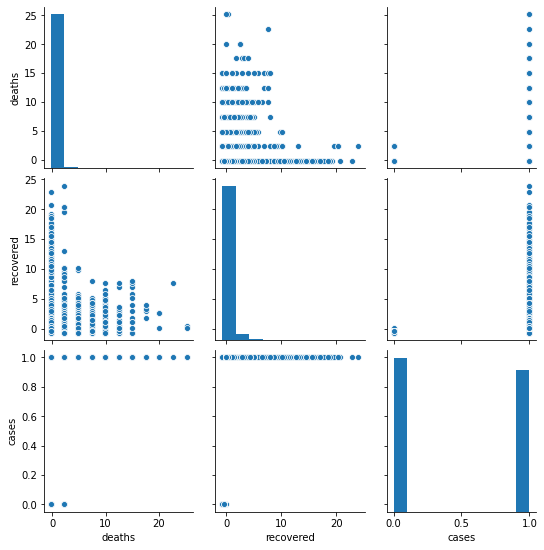

In [0]:
sns.pairplot(df)

##***F. Mapa de calor de correlación***

* ***Casos (cases) x Muertes (deaths) x Recuperados (recovered)***

Dado el siguiente mapa, se puede observar que: 

* La correlación entre **Muertos (deaths)** y **Recuperados (recovered)** es baja.

* La correlación entre **Muertos (deaths)** y **Casos (cases)** es relativamente baja.

* La correlación entre **Recuperados (recovered)** y **Casos (cases)** es de aproximadamente 0.5, por lo que es decente.



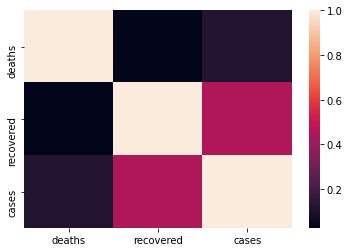

In [0]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#***6. Muestreo y Testeo con clasificadores***


A continuación, se definen funciónes para las pruebas de los modelos con las distintas muestras a generar. la función ***split_simple*** sirve para probar un modelo usando dicha tecnica de muestreo. la función ***crossval_score*** sirve para probar un modelo usando ***cross-validation***. la función ***stracrossval_score*** sirve para probar un modelo usando ***cross-validation estratificado***. Dichas funciones se definen como sigue. 

In [0]:
#split simple
def split_simple(model, X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
  model.fit(X_train, Y_train)
  predicciones = model.predict(X_test)
  return accuracy_score(Y_test, predicciones)

#Cross-validation No estratificado
def crossval_score(model, X, Y, nfols):
  score = 0
  kf = KFold(n_splits=nfols)
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, Y_train)
    predicciones = model.predict(X_test)
    score += accuracy_score(Y_test, predicciones)
  return score/nfols

#definiendo función para cross-validation estratificado
def stracrossval_score(model, X, Y, nfols):
  score = 0
  skf = StratifiedKFold(n_splits=nfols)
  for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, Y_train)
    predicciones = model.predict(X_test)
    score += accuracy_score(Y_test, predicciones)
  return score/nfols

Se probaran 4 modelos de clasificación. Para cada modelo, se utilizaran diferentes tecnicas de muestreo. Se utilizara **split simple**, **cross-validation** con 5 diferentes valores de ***k*** y **cross validation estratificado** con 5 diferentes valores de ***k***. ***Asimismo, es importante mencionar que se esta imprimiendo la precisión promedio por cada prueba realizada con cada muestra, modelo de aprendizaje y valor de k si es el caso.***

##***A. K vecinos más cercanos (KNN)***

Dado este modelo, es importante, determinar el mejor valor de k. A continuación se realiza dicho proceso antes de evaluar el modelo con las distintas tecnicas de muestreo. 

In [0]:
#determinar mejor valor de k para los datos
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
k = determinar_mejor_k(X, Y, 1, 11)
knn = KNN(n_neighbors=k)
print(k)

2


###***Split simple***

In [0]:
split_simple(knn, X,Y)

0.9208693922212275

###***Cross-validation***

In [0]:
crossval_score(knn, X, Y,  5)

0.9201550323908517

In [0]:
crossval_score(knn, X, Y,  6)

0.9201552347364234

In [0]:
crossval_score(knn, X, Y,  3)

0.9003984063745021

In [0]:
crossval_score(knn, X, Y,  4)

0.9144249263670364

In [0]:
crossval_score(knn, X, Y,  7)

0.9201549560547347

###***Cross-validation estratificado***

In [0]:
stracrossval_score(knn, X, Y, 5)

0.9051443695500321

In [0]:
stracrossval_score(knn, X, Y, 3)

0.8949818702717222

In [0]:
stracrossval_score(knn, X, Y, 4)

0.9011753986550048

In [0]:
stracrossval_score(knn, X, Y, 6)

0.9201549007557821

In [0]:
stracrossval_score(knn, X, Y, 2)

0.8532762207675517

##***B. Arboles de Decisión***

In [0]:
dtree = DecisionTreeClassifier()

###***Split simple***

In [0]:
split_simple(dtree, X,Y)

0.92181438376604

###***Cross-validation***

In [0]:
crossval_score(dtree, X, Y,  5)

0.9201550323908517

In [0]:
crossval_score(dtree, X, Y,  6)

0.9201552347364234

In [0]:
crossval_score(dtree, X, Y,  3)

0.9201545876419416

In [0]:
crossval_score(dtree, X, Y,  4)

0.920154901298396

In [0]:
crossval_score(dtree, X, Y,  7)

0.9201549560547347

###***Cross-validation estratificado***

In [0]:
stracrossval_score(dtree, X, Y, 5)

0.9201548141934222

In [0]:
stracrossval_score(dtree, X, Y, 3)

0.9201545876419416

In [0]:
stracrossval_score(dtree, X, Y, 4)

0.9201548077866073

In [0]:
stracrossval_score(dtree, X, Y, 6)

0.9201549007557821

In [0]:
stracrossval_score(dtree, X, Y, 2)

0.9201546920487773

##***C. Máquinas de vectores de soporte (SVM)***

In [0]:
svm = SVC()

###***Split simple***

In [0]:
split_simple(svm, X,Y)

0.918531781557744

###***Cross-validation***

In [0]:
crossval_score(svm, X, Y, 5)

0.9201550323908517

In [0]:
crossval_score(svm, X, Y, 6)

0.9201552347364234

In [0]:
crossval_score(svm, X, Y, 3)

0.9201545876419416

In [0]:
crossval_score(svm, X, Y, 4)

0.920154901298396

In [0]:
crossval_score(svm, X, Y, 7)

0.9201549560547347

###***Cross-validation estratificado***

In [0]:
stracrossval_score(svm, X, Y, 5)

0.9201548141934222

In [0]:
stracrossval_score(svm, X, Y, 3)

0.9201545876419416

In [0]:
stracrossval_score(svm, X, Y, 4)

0.9201548077866073

In [0]:
stracrossval_score(svm, X, Y, 6)

0.9201549007557821

In [0]:
stracrossval_score(svm, X, Y, 2)

0.9201546920487773

##***D. Perceptron Multicapa***

In [0]:
mlp = MLPClassifier()

###***Split simple***

In [0]:
split_simple(mlp, X,Y)

0.9219138565602307

###***Cross-validation***

In [0]:
crossval_score(mlp, X, Y,  5)

0.9201550323908517

In [0]:
crossval_score(mlp, X, Y,  6)

0.9201552347364234

In [0]:
crossval_score(mlp, X, Y,  3)

0.9201545876419416

In [0]:
crossval_score(mlp, X, Y,  4)

0.920154901298396

In [0]:
crossval_score(mlp, X, Y,  7)

0.9201549560547347

###***Cross-validation estratificado***

In [0]:
stracrossval_score(mlp, X, Y, 5)

0.9201548141934222

In [0]:
stracrossval_score(mlp, X, Y, 3)

0.9201545876419416

In [0]:
stracrossval_score(mlp, X, Y, 4)

0.9201548077866073

In [0]:
stracrossval_score(mlp, X, Y, 6)

0.9201549007557821

In [0]:
stracrossval_score(mlp, X, Y, 2)

0.9201546920487773

##***E. Comparación y conclusión sobre el mejor resultado***

Ahora bien, habiendo realizado todas las pruebas respectivas, se realizara una comparación a nivel de todos **los modelos, muestreos y resultados obtenidos**. Para ello, se procedera a mostrar ua serie de tablas, una por cada modelo, en la que se resume la información mencionada. Se tiene como objetivo identificar ***el modelo, la tecnica de muestreo y el valor de k si es el caso que hayan logrado el mejor resultado en este caso***. Dicho resultado, se mide a nivel de precisión con respecto a las predicciónes. 

* ***K vecinos más cercanos (KNN)***

![alt text](https://i.ibb.co/17XjVjr/tt.png)

* ***Arboles de Decisión***

![alt text](https://i.ibb.co/hCL2xPm/tttr.png)

* ***Vectores de maquinas de soporte (SVM)***

![alt text](https://i.ibb.co/3sjhCXw/yyyyyy.png)

* ***Perceptron Multicapa***

![alt text](https://i.ibb.co/HNVsTry/uuuu.png)

Dadas las tablas anteriores, se obtuvo que ***el modelo Perceptron Multicapa, usando la tecnica de muestreo split simple, permite alcanzar una precisión de 92.1913857%***. Dicha precisión corresponde al mejor resultado obtenido dadas las pruebas realizadas en este caso. ***En sintesís, se logro identificar el performance del trabajo producido y los resultados optimos para este caso. Se realizo un preprocesamiento adecuado de los datos, de tal manera que se optimice el performance de los distintos clasificadores testeados.***